Import the modules that will be used.

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise 11.1

Determine by counting the number of mathematical operations the complexity of:

1. Dot product between two vectors
1. Matrix-vector product
1. Matrix-matrix product

for vectors of length $n$ and matrices of size $n \times n$.

This is a reasoning exercise - you do not need to write a program. Express your answers in text and using LaTeX in a Markdown cell.


### Optional

Test the complexity experimentally with your own functions for performing the operations, and
with the NumPy 'vectorised' equivalents.

1.) Dotting two vectors of length n: there are n multiplications followed by n-1 additions to sum everything up. Suppose multiplication and addition are both time constant $O(1)$ complexity. Therefore linear $O(n)$ complexity overall.

2.) Product of matrix nxn and vector length n: each row of the matrix is multiplied by the vector. This means n operations per row (and then addition of the terms, so n + (n-1) operations actually). But there are n rows, so n sets of these operations. So $n*n$ -> $O(n^2)$ complexity.

3.) Product of two nxn matrices: each row in the first matrix multiplied by a column in the second matrix then summed. Like above, this would comprise 2n-1 operations. There are n columns but also n rows, so $n*n*(2n-1)$ operations = $O(n^3)$ complexity. 

(vectorised = applying operations to all the elements at once rather than looping via index)

*did not do the optional exercise as I feel like I've already understood the key concepts of time complexity as per this notebook.


## Exercise 11.2

For the recursive factorial algorithm in Activity 04, determine the algorithmic complexity by inspecting your implementation of the algorithm. Test this against numerical experiments.

### Solution

Recall the factorial algorithm from Activity 04.4:

In [5]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return factorial(n - 1)*n

The function calls itself (recursively) $n$ times, hence it has complexity $O(n)$. We test this below and plot
the times.

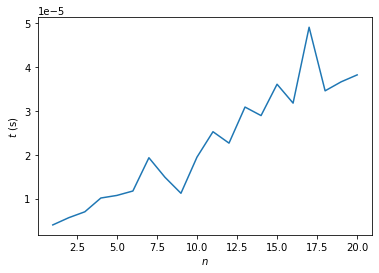

In [41]:
n = np.arange(1,21,dtype='int64') #must avoid 'overflow encountered in longlong_scalars'
#21 not included
times = []
for i in n:

    t = %timeit -q -n10 -r1 -o factorial(i)
    #good old magic command timeit
    #n- trials
    times.append(t.average)
    
#limit for int64 is 9x10^18
#so the limit is 20 factorial.
plt.plot(n,times)
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

plt.show()

#it appears that the factorial recursion algorithm is linear i.e. O(n) in complexity.
#this is because increasing n means there's one extra multiplication operation to be done (which is assumed to be O(1))
#or in other words, n is decremented until it reaches 0, meaning that the function is called recursively n times. So time is proportional to n.

#although as n tends to infinity, each multiplication operation is no longer really time constant.

## Exercise 11.3

Determine experimentally the complexity of computing the determinant of a matrix. You can generate an $n \times n$ matrix using:

In [42]:
n = 100
A = np.random.rand(n, n)

and the determinant can be computed by:

In [45]:
det = np.linalg.slogdet(A)
#this specific function returns the determinant sign and the natural log of the det.

Be sure that you test for sufficiently large $n$ to get into the 'large' $n$ regime.

### Solution

Time computation of determinant:

In [49]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 12) #4 to 2048 (2^11)
times = []
for i in N:
    trix = np.random.rand(i,i)
    t = %timeit -q -n20 -r1 -o np.linalg.slogdet(trix)

    times.append(t.average)


Plot result:

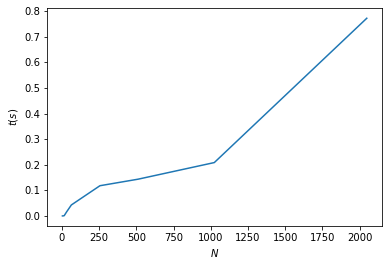

In [52]:
plt.plot(N,times)
plt.xlabel('$N$')
plt.ylabel('$t (s)$')
plt.show()
#it looks...cubic in complexity? There's points of inflection around the N=250 and N=1000 marks.
#turns out it is O(n^3) indeed!
#because np.linalg.slogdet uses LU (lower-upper) factorisation/decomposition which is of cubic polynomial complexity.



In [ ]:
#https://github.com/ipython/ipython/blob/61a4f1f7c11c30372fed53d6c3a90db2f692109f/IPython/core/magics/execution.py#L66
#the source code for ipython timeit that shows .best, .average.....for some reason it's not properly documented.